In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

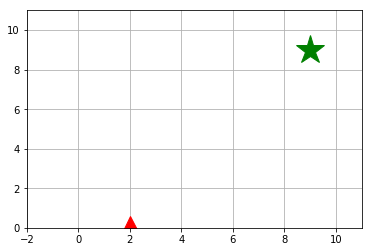

In [2]:
target_x, target_y = 9, 9  # target
x, y = 2, 0    # starting point

pathx = [x]
pathy = [y]

def draw():
    plt.plot(target_x, target_y, 'g*', markersize=30)
    plt.plot(pathx[-1], pathy[-1], 'r^', markersize=25)
    plt.plot(pathx, pathy)
    plt.axis((-2,target_x+2,0,target_y+2))
    plt.grid()

draw()

# Represent or Encode Genotype

 - Each gene will be an action
 - We have 3 actions ['up', 'left', 'right']
  - if it is 'up', agents y position will increase by one
  - if it is 'left', agents x position will decrease by one
  - if it is 'right', agents x position will increase by one

In [3]:
agent_genotype = ['up', 'left','up', 'left', 'right']

In [4]:
def up(x,y):
    return x, y +1

def left(x,y):
    return x-1, y

def right(x,y):
    return x + 1, y

In [5]:
take_action = {'up': up, 'left':left, 'right':right}

['up', 'up', 'up', 'up', 'right', 'right', 'right']


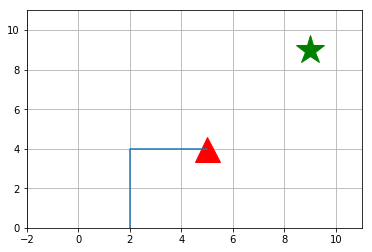

In [6]:
agent_genotype = ['up', 'up','up', 'up', 'right', 'right', 'right']

pathx = [x]
pathy = [y]
for gene in agent_genotype:
    new_x, new_y = take_action[gene](pathx[-1], pathy[-1])
    pathx.append(new_x)
    pathy.append(new_y)

draw()
print(agent_genotype)

In [7]:
possible_genes = ['up', 'right', 'left']
agent_genotype = None # choose randomly 8 actions

In [8]:
agent_genotype = np.random.choice(possible_genes, size = 8)
agent_genotype

array(['up', 'left', 'left', 'up', 'right', 'left', 'up', 'up'],
      dtype='<U5')

# Genotype and Phenotype of an agent

In [9]:
def up(x,y): return x, y +1
def left(x,y): return x-1, y
def right(x,y): return x + 1, y

take_action = {'up': up, 'left':left, 'right':right}
possible_genes = ['up', 'right', 'left']

def create_genotype(n = 8):
    agent_genotype = np.random.choice(possible_genes, size = n)
    return agent_genotype

def phenotype(x, y, agent_genotype):
    pathx = [x]
    pathy = [y]
    for gene in agent_genotype:
        new_x, new_y = take_action[gene](pathx[-1], pathy[-1])
        pathx.append(new_x)
        pathy.append(new_y)
    return pathx, pathy

['left' 'left' 'right' 'left' 'up' 'right' 'right' 'up' 'right' 'right']


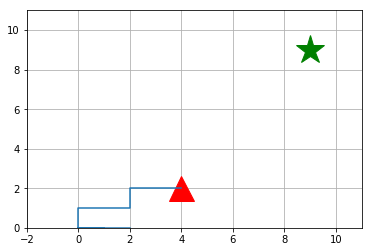

In [10]:
agent_genotype = create_genotype(n = 10)
pathx, pathy = phenotype(x,y,agent_genotype)

draw()
print(agent_genotype)

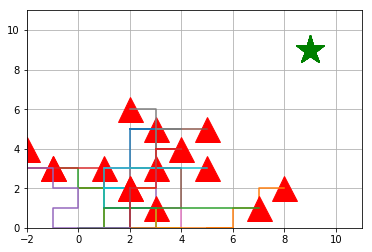

In [11]:
N =15
population = [create_genotype(n = 10) for i in range(N)]

for i in range(N):
    pathx, pathy = phenotype(x,y,population[i])
    draw()

# Evaluation

$$fitness(agent) = \frac{1}{1 + distance(agent, target)}$$

In [12]:
pathx[-1], pathy[-1]

(-2, 4)

In [13]:
def fitness(agent_x, agent_y):
    return 1/(1 + np.sqrt((agent_x - target_x)**2 + (agent_y - target_y)**2))

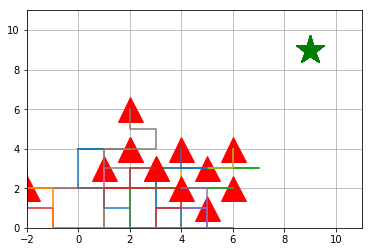

In [14]:
N =15
population = [create_genotype(n = 10) for i in range(N)]
fitness_values = []
for i in range(N):
    pathx, pathy = phenotype(x,y,population[i])
    fitness_values.append(fitness(pathx[-1], pathy[-1]))
    draw()

In [15]:
#fitness_values

In [16]:
reproduction_probabiliy = [val/sum(fitness_values) for val in fitness_values]

In [17]:
parents = np.random.choice(N, size = 2, p = reproduction_probabiliy)

In [18]:
P0 = population[parents[0]]
P1 = population[parents[1]]

In [19]:
P0

array(['right', 'left', 'right', 'right', 'left', 'right', 'right', 'up',
       'up', 'left'], dtype='<U5')

In [20]:
P1

array(['right', 'right', 'up', 'up', 'left', 'right', 'up', 'right',
       'right', 'up'], dtype='<U5')

# Crossover
 - Select a random cutoff point
 - Exchange genes to create a new offspring

In [21]:
reproduction_probabiliy = [val/sum(fitness_values) for val in fitness_values]
parents = np.random.choice(N, size = 2, p = reproduction_probabiliy)

P0 = population[parents[0]]
P1 = population[parents[1]]

In [22]:
cutoff = np.random.randint(len(P0))

C0 = np.concatenate((P0[:cutoff], P1[cutoff:]))
C1 = np.concatenate((P1[:cutoff], P0[cutoff:]))

In [23]:
C0

array(['left', 'right', 'up', 'up', 'right', 'left', 'right', 'left',
       'left', 'up'], dtype='<U5')

In [24]:
type(C0)

numpy.ndarray

In [25]:
C0[0:5]

array(['left', 'right', 'up', 'up', 'right'], dtype='<U5')

# Mutation

In [26]:
mutation_point = np.random.randint(len(C1))

C0[mutation_point] = np.random.choice(possible_genes)

In [27]:
C0, mutation_point

(array(['left', 'right', 'up', 'left', 'right', 'left', 'right', 'left',
        'left', 'up'], dtype='<U5'), 3)

# OOP

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

class agent():
    def __init__(self, m = 16, start_x = 0, start_y = 2, target_x = 9, target_y = 9, possible_genes = ['up', 'right', 'left']):
        self.x, self.y  = start_x, start_y
        self.target_x, self.target_y = target_x, target_y
        self.pathx, self.pathy = [start_x], [start_y]
        
        self.possible_genes = possible_genes
        self.take_action = {'up': self.go_up, 
                            'left':self.go_left, 
                            'right':self.go_right}
        
        self.m = m
        self.create_genotype()
        self.phenotype()
    
    def go_up(self): 
        self.y = self.y +1
    def go_left(self): 
        self.x = self.x-1
    def go_right(self): 
        self.x = self.x+1

    def create_genotype(self):
        self.genome = np.random.choice(self.possible_genes, size = self.m)
    
    def set_gene(self, new_gene):
        self.genome = new_gene
    
    def phenotype(self):
        for gene in self.genome:
            self.take_action[gene]()
            
            self.pathx.append(self.x)
            self.pathy.append(self.y)
    
    def fitness(self):
        error_x = (self.target_x - self.pathx[-1])
        error_y = (self.target_y - self.pathy[-1])
        return 1/(1 + np.sqrt(error_x**2 + error_y**2))
    
    def draw(self, verbose = True):
        if verbose: print(self.genome)
        plt.plot(self.target_x, self.target_y, 'g*', markersize=30)
        plt.plot(self.pathx[-1], self.pathy[-1], 'r^', markersize=25)
        plt.plot(self.pathx, self.pathy)
        plt.axis((-2,self.target_x+2,0,self.target_y+2))
        plt.grid()

['right' 'up' 'up' 'left' 'right' 'left' 'up' 'up' 'left' 'left' 'right'
 'up' 'left' 'up' 'left' 'left']


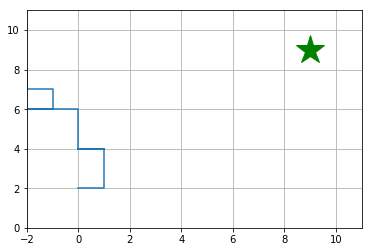

In [29]:
target_x, target_y = 9, 9  # target
x, y = 2, 0    # starting point

agent0 = agent()
agent0.draw()

In [30]:
class evolution():
    def __init__(self, N = 10):
        self.N = N
        
        self.population = [agent() for i in range(N)]
        self.fitness_values = [self.population[i].fitness() for i in range(N)]
        
        total_fitness = sum(self.fitness_values)
        self.reproduction_probabiliy = [val/total_fitness for val in self.fitness_values]
        
        self.best_agent = self.population[np.argmax(self.fitness_values)]
        
    def selection(self):
        parents = np.random.choice(self.N, size = 2, p = self.reproduction_probabiliy)
        return parents
    
    def crossover(self, parent0, parent1):
        cutoff = np.random.randint(len(parent0.genome))
        child= np.concatenate((parent0.genome[:cutoff],parent1.genome[cutoff:]))
        return child

    def mutation(self, child):
        mutation_point = np.random.randint(len(child.genome))
        child.genome[mutation_point] = np.random.choice(possible_genes)
        
    def create_offspring(self):
        parents = self.selection()
        P0, P1 = self.population[parents[0]], self.population[parents[1]]
        
        child_agent = agent()
        child_genome = self.crossover(parent0 = P0, parent1 = P1)
        child_agent.set_gene(child_genome)
        self.mutation(child_agent)
        
        return child_agent
    
    def create_new_population(self):
        new_population = [self.create_offspring() for i in range(self.N-1)] + [self.best_agent]
        self.population = new_population

        self.fitness_values = [self.population[i].fitness() for i in range(self.N)]
        total_fitness = sum(self.fitness_values)
        self.reproduction_probabiliy = [val/total_fitness for val in self.fitness_values]
        self.best_agent = self.population[np.argmax(self.fitness_values)]
    
    def evolve(self, G = 10):
        for i in range(G):
            self.create_new_population()
        return self.best_agent

['right' 'left' 'up' 'right' 'right' 'right' 'right' 'up' 'right' 'up'
 'left' 'left' 'right' 'up' 'up' 'left']


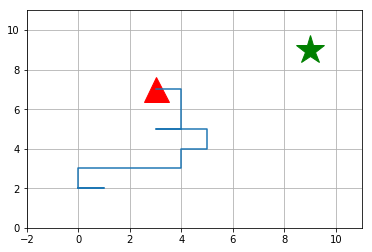

In [31]:
world = evolution()
world.best_agent.draw()

['right' 'left' 'up' 'right' 'up' 'left' 'right' 'up' 'left' 'up' 'left'
 'left' 'right' 'up' 'left' 'left']


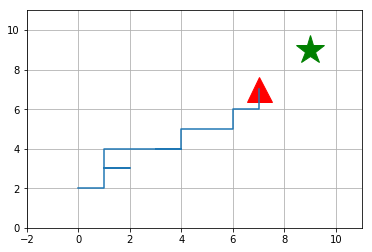

In [32]:
world.evolve()
world.best_agent.draw()

['right' 'left' 'up' 'right' 'up' 'left' 'right' 'up' 'left' 'left' 'left'
 'left' 'right' 'left' 'right' 'left']


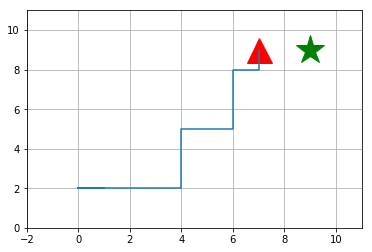

In [33]:
world.evolve()
world.best_agent.draw()